**Multi-Dimensional Sentiment Analysis On Goodreads book reviews- CS648**
By - Kumari Sundaram Shailbala(19250680)
1. Connecting to goodreads API




In [2]:
! pip install goodreads_api_client

     |████████████████████████████████| 92kB 5.0MB/s 
     |████████████████████████████████| 133kB 10.4MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
  Created wheel for rauth: filename=rauth-0.7.3-cp36-none-any.whl size=16055 sha256=3f5ea524ef960835df496b198fa0023b79805ee2579dd09294e3c04940934259
  Stored in directory: /root/.cache/pip/wheels/7b/94/5d/81afc278dd5da884a0002563dc4b0fe85f9067a5a40f76f858
Successfully built rauth
ERROR: tensorflow-datasets 2.1.0 has requirement requests>=2.19.0, but you'll have requests 2.18.3 which is incompatible.
ERROR: tensorboard 2.3.0 has requirement requests<3,>=2.21.0, but you'll have requests 2.18.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.18.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Success

2. Packages Required

In [1]:
#Packages Required
!pip install nltk
!pip install vaderSentiment
!pip install wordcloud
import nltk
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
import nltk
nltk.download('vader_lexicon')
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import goodreads_api_client as gr
from nltk.tokenize import PunktSentenceTokenizer
from nltk.corpus import webtext
import nltk, re
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.classify import NaiveBayesClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

     |████████████████████████████████| 133kB 4.3MB/s 
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


3. Adding Goodreads Developer Key and checking the connection

In [2]:
client = gr.Client(developer_key = 'pg71kaPOugzrBtLEGTyjA')
book = client.Book.show('1128434')

keys_wanted = ['id', 'title', 'isbn','ratings_count']
reduced_book = {k:v for k, v in book.items() if k in keys_wanted}
reduced_book

{'id': '1128434',
 'isbn': '0575077832',
 'ratings_count': '46829',
 'title': 'The Last Wish (The Witcher, #0.5)'}

4. Extracting the rating and book details from the Goodreads Database. 

In [4]:
red_book= []
book_review_total= []
counter= 0;
keys_wanted = ['id', 'title', 'isbn','ratings_count']
for i in range(1,10000):
    try:
      books = (client.Book.show(i));
      book_review_total.append(books);
      reduced_book = {k:v for k, v in books.items() if k in keys_wanted}
      #print(reduced_book)
      red_book.append(reduced_book)
    except:
      counter += 1

#print (book_review_total[:10]);
print ('Number of books without ratings:', counter);
print(red_book[:5])

[{'id': '1', 'title': 'Harry Potter and the Half-Blood Prince (Harry Potter, #6)', 'isbn': None, 'ratings_count': '2204937'}, {'id': '2', 'title': 'Harry Potter and the Order of the Phoenix (Harry Potter, #5)', 'isbn': '0439358078', 'ratings_count': '2270175'}, {'id': '3', 'title': "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)", 'isbn': None, 'ratings_count': '6516226'}, {'id': '4', 'title': 'Harry Potter and the Chamber of Secrets (Harry Potter, #2)', 'isbn': '0439554896', 'ratings_count': '6388'}, {'id': '5', 'title': 'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)', 'isbn': '043965548X', 'ratings_count': '2492419'}]


5. Plotting Rating count Vs Book Title

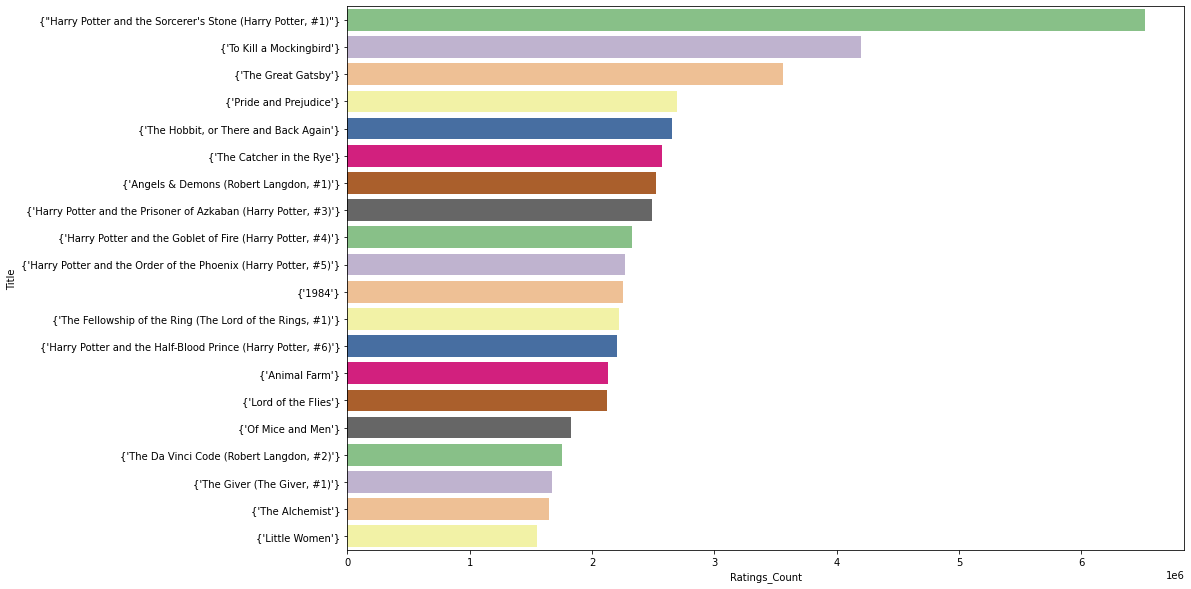

In [5]:
title= []
rating=[]
id= []
list2= ['title']
list3= ['ratings_count']
list1= ['id']

for lst in red_book:
  l = {v for k, v in lst.items() if k in list2}
  #print(l)
  title.append(l)
  r = {v for k, v in lst.items() if k in list3}
  rating.append(r)

  i = {v for k, v in lst.items() if k in list1}
  id.append(i)

df = pd.DataFrame(rating)
df['title'] =  title
df.columns = ['Ratings_Count', 'Title']
#print(type(df['Ratings_Count'][0]))
df['Ratings_Count'] = df['Ratings_Count'].astype('float')
df['Title'] = df['Title']. astype('str')
#df.head(10)
most_rated = df.sort_values(by='Ratings_Count', ascending = False).head(20).set_index('Title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['Ratings_Count'], most_rated.index, palette='Accent')

In [4]:
review_total= []
counter= 0;
for i in range(1,1000):
    try:
        books = (client.Review.show(i));
        review_total.append(books);
    except:
        counter += 1
        
#print (review_total);
print ('Number of books without reviews:', counter);

Number of books without reviews: 183


6. Getting the dataset of 12k, 10k, 8k, 6k, 4k, and 2k

In [ ]:
review_total_10k= []
review_total_8k= []
review_total_6k= []
review_total_4k= []
review_total_2k= []
counter_8k= 0;
counter_10k = 0;
counter_6k = 0;
counter_4k = 0;
counter_2k = 0;
list1 = [2000,4000,6000,8000,10000]
for r in list1:
  
  for i in range(1,r):
    if r == 10000:
      try:
        books = (client.Review.show(i));
        review_total_10k.append(books);
      except:
        counter_10k += 1
    if r == 8000:
      try:
        books = (client.Review.show(i));
        review_total_8k.append(books);
      except:
        counter_8k += 1
    if r == 6000:
      try:
        books = (client.Review.show(i));
        review_total_6k.append(books);
      except:
        counter_6k += 1
    if r == 4000:
      try:
        books = (client.Review.show(i));
        review_total_4k.append(books);
      except:
        counter_4k += 1
    if r == 2000:
      try:
        books = (client.Review.show(i));
        review_total_2k.append(books);
      except:
        counter_2k += 1
        
#print (review_total);
print ('Number of books without reviews:', counter_2k);
print ('Number of books without reviews:', counter_4k);
print ('Number of books without reviews:', counter_6k);
print ('Number of books without reviews:', counter_8k);
print ('Number of books without reviews:', counter_10k);

Number of books without reviews: 319
Number of books without reviews: 694
Number of books without reviews: 1276
Number of books without reviews: 1676
Number of books without reviews: 1900


Analysis on number of reviews taken and number of books without reviews



[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Total Data'),
 Text(0.5, 1.0, 'Count of Data with No Reviews ')]

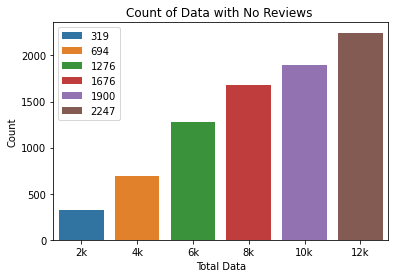

In [ ]:
count_rev = [counter_2k, counter_4k, counter_6k, counter_8k, counter_10k,counter]
x = ['2k', '4k', '6k','8k', '10k','12k']
ax = sns.barplot(x, count_rev, hue= count_rev, dodge= False)
ax.set(xlabel= 'Total Data',
       ylabel='Count',
       title= 'Count of Data with No Reviews ')

Gathering the review dataset

In [ ]:
#item = review_total[0]['comments']['comment']['body']
#type(item)
review_total = review_total
for i in range(0, len(review_total)):
    
    if((review_total[i]['body'] == None) and ('comments' in review_total[i])):
        print(i)
        if(isinstance(review_total[i]['comments']['comment'], list) ):
            for items in review_total[i]['comments']['comment']:
                print(items['body'])
        else:
            print(review_total[i]['comments']['comment']['body'])
    else:
        print(review_total[i]['body'])

In [ ]:
comments = {}
body = {}
comment_count = 0
body_count = 0         
for item in review_total:
    #print(i)
    if (item['body'] == None and ('comments' in item)):
        if(isinstance(item['comments']['comment'], list) ):
            nested_comment = {}
            nested_count = 0
            for val in item['comments']['comment']:
                    nested_comment[nested_count] = val['body']
                    nested_count =  nested_count + 1
            
            comments[comment_count] = nested_comment
        else:
            comments[comment_count] = item['comments']['comment']['body']
        
        comment_count = comment_count + 1
    else:
        body[body_count] = item['body']
        body_count = body_count + 1

print("################################################")
print(comments)
print("################################################")
print(body)
print("################################################")


In [7]:
tot = {}
for k, v in dict(body).items():
    if v is None:
        del body[k]
    else:
      tot = body
#merging all the comments together in tot
tot = {**tot, **comments}

Cleaning the data

In [ ]:
com = str(tot). lower()
com= com.replace('</br>','')
com= com.replace('<br/>','')
com= com.replace('<br>','')
com= com.replace("<br ><br >","")
com= com.replace("<br/><br/><br/><br/>","")
com= com.replace("/","")
com= com.replace("<a></a>","")
com= com.replace("<a>","")
com= com.replace("<a href=","")
# remove all single characters
com = re.sub(r'\s+[a-zA-Z]\s+', ' ', com)
# Remove single characters from the start
com = re.sub(r'\^[a-zA-Z]\s+', ' ', com)
com = re.sub(r'\s+', ' ', com, flags=re.I)
com = re.sub('^b\s+', '', com)
com = com.replace("^[^#\[][^=]*?=[^=]*?$\\:)}>.<'href''','['``''\\""", "")
com = com.replace("https:www.goodreads.combookshow3049.sir_gawain_and_the_green_knight__signet_classics_", "")

replacement_patterns = [
(r'won\'t', 'will not'),
(r'can\'t', 'cannot'),
(r'i\'m', 'i am'),
(r'it\'s', 'it is'),
(r'isn\\\'t', 'is not'),
(r'ain\'t', 'is not'),
(r'i\'ll', 'i will'),
(r'i\'m', 'i am'),
(r'(\w+)\'ll', '\g<1> will'),
(r'(\w+)n\'t', '\g<1> not'),
(r"(\w+)\'ve", "\g<1> have"),
(r"(\w+)\'s", "\g<1> is"),
(r'(\w+)\'re', '\g<1> are'),
(r'(\w+)\'d', '\g<1> would')
]
class RegexpReplacer(object):
    def __init__(self, patterns=replacement_patterns):
        self.patterns = [(re.compile(regex), repl) for (regex, repl) in patterns]
    
    def replace(self, text):
      s = text
      for (pattern, repl) in self.patterns:
        s = re.sub(pattern, repl, s)
      
      return s

replacer=RegexpReplacer()
com = (replacer.replace(com))
print(com)

f = open("/content/tok.txt", "w")
f.write(com)
f.close()

Data Cleaning and Transformation

In [7]:
with open('/content/tok_10k.txt') as f:
  review_main = f.read()

sent_tokenizer = PunktSentenceTokenizer(review_main)
#sents = sent_tokenizer.tokenize(text)
tokenized_text=sent_tokenizer.tokenize(review_main)
#print(tokenized_text)

import re 
  
def remove(list): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list] 
    return list

def removed(list): 
    pattern = '<br >'
    list = [re.sub(pattern, '', i) for i in list] 
    return list

def remov(list): 
    pattern = '<a target=*'
    list = [re.sub(pattern, '', i) for i in list] 
    return list
def removing(list): 
    pattern = ':'
    list = [re.sub(pattern, '', i) for i in list] 
    return list
def removs(list): 
    pattern = 'https:www.goodreads*'
    list = [re.sub(pattern, '', i) for i in list] 
    return list
tokenized_text = (remove(tokenized_text))
tokenized_text = (removed(tokenized_text))
tokenized_text=  (remov(tokenized_text))
tokenized_text=  (removing(tokenized_text))
tokenized_text=  (removs(tokenized_text))

In [8]:
tokenized_word=word_tokenize(str(tokenized_text))


Word Count

In [9]:
ENGLISH_RE = re.compile(r'[a-z]+')
#tokenized_t = str(tokenized_text)
lem = nltk.WordNetLemmatizer()
lemmatized = []
for word in tokenized_word:
    # Lowerize for correct use in stopwords etc
    w = word.lower()
    #print(w)
        # Check english terms
    if not ENGLISH_RE.match(w):
        continue
    # Check stopwords
    if w in stopwords.words('english'):
        continue
    if w == "br/":
      continue
    lemmatized.append(lem.lemmatize(w))
#print(lemmatized)
fdist1 = nltk.FreqDist(lemmatized)
fdist1.most_common(30)

[('book', 872),
 ('read', 484),
 ('story', 216),
 ('one', 213),
 ('time', 154),
 ('good', 148),
 ('great', 148),
 ('like', 145),
 ('really', 133),
 ('love', 124),
 ('get', 105),
 ('novel', 102),
 ('life', 97),
 ('favorite', 91),
 ('reading', 90),
 ('much', 84),
 ('think', 79),
 ('year', 76),
 ('interesting', 76),
 ('first', 75),
 ('thing', 71),
 ('would', 70),
 ('loved', 68),
 ('author', 68),
 ('make', 67),
 ('character', 67),
 ('know', 65),
 ('lot', 64),
 ('many', 62),
 ('way', 61)]

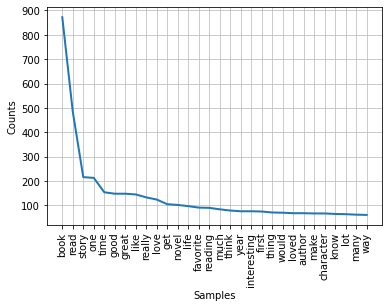

In [13]:
fdist1.plot(30,cumulative=False)
plt.show()

In [11]:
stop_words=set(stopwords.words("english"))
print(stop_words)

filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Stemmed Sentence:",stemmed_words)
from nltk import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
tag_pos =nltk.pos_tag(tokenized_word)

{'am', "couldn't", 'mightn', 'so', "you're", 'then', 'to', "aren't", 'which', 'll', 'while', "wasn't", 'into', 'what', 'again', 'aren', 'out', 'why', 'but', 'because', 'theirs', 'wouldn', 'my', 'who', 'off', 'from', 'not', 'him', "mustn't", 's', 'most', 'an', 'at', 'against', 'if', 'yourself', 'her', 'between', "you'd", 'some', 'or', 'after', 'through', 'o', "you'll", 'this', "it's", 'we', 'is', 'as', 'these', 'about', 'had', 'all', 'being', 'by', 'isn', 'just', 'same', "doesn't", 'more', 'both', 'there', 'does', 'our', "mightn't", 'he', 'herself', 'only', "hasn't", 'of', 'above', 'too', 'any', 'them', 'ours', 'the', 'haven', 'in', 'yours', 'do', 'shan', "she's", 'few', 'here', 'below', 'on', 'those', 'hadn', "hadn't", 'until', 'be', 'd', 'itself', 'wasn', 'whom', 'ain', "needn't", "didn't", 'can', 'during', 'how', 'than', 've', 'ma', 'she', "isn't", 'yourselves', 'themselves', 'further', 'your', 'when', 'himself', 'each', "shan't", 'did', "wouldn't", 'i', 'doing', 'once', 'didn', 'm',

In [14]:
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))
#The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) 
#and +1 (most extreme positive).

#positive sentiment : (compound score >= 0.05)
#neutral sentiment : (compound score > -0.05) and (compound score < 0.05)
#negative sentiment : (compound score <= -0.05)

for text in tokenized_text:
 sentiment_analyzer_scores(text)
 sid_obj = SentimentIntensityAnalyzer() 
 sentiment_dict = sid_obj.polarity_scores(text)
 print(sentiment_dict)
 print("Overall sentiment dictionary is : ", sentiment_dict) 
 print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
 print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
 print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
 
 print("Sentence Overall Rated As", end = " ") 
 # decide sentiment as positive, negative and neutral 
 if sentiment_dict['compound'] >= 0.05 : 
   print("Positive") 
   
 elif sentiment_dict['compound'] <= - 0.05 : 
  print("Negative") 
  
 else : 
  print("Neutral")


Streaming output truncated to the last 5000 lines.
Sentence Overall Rated As Positive
',  'one old boss of mine bought  copies of this book and handed out to us at work. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
yes, this is cliche to rate for the corporate set, however, this book inspired me to quit that job, and find endless areas of life to apply it too. {'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.7096}
{'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.7096}
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.7096}
sentence was rated as  0.0 % Negative
sentence was rated as  82.1 % Neutral
sentence was rated as  17.9 % Positive
Sen

1912
332
777


[Text(0, 0.5, 'Reviews'), Text(0.5, 1.0, 'Count of Number of Reviews ')]

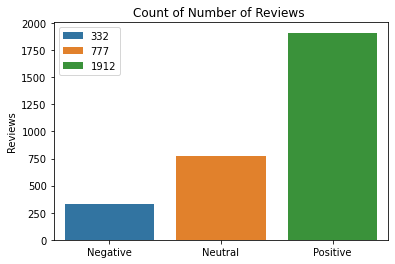

In [15]:
#positive count is more compared to negative or neutral count - Vader Analysis for text

pos_sum = 0
neg_sum = 0
neu_sum = 0
for text in tokenized_text:
 #sentiment_analyzer_scores(text)
 sid_obj = SentimentIntensityAnalyzer() 
 sentiment_dict = sid_obj.polarity_scores(text)
 #print(sentiment_dict)
 if sentiment_dict['compound'] >= 0.05 or sentiment_dict['pos'] > 0.0:
   pos_sum +=  1
 elif sentiment_dict['compound'] <= -0.05 or sentiment_dict['neg'] > 0.0:
   neg_sum +=  1
 else : 
   neu_sum +=1
print(pos_sum)
print(neg_sum)
print(neu_sum)

summ = ['Negative', 'Neutral','Positive']
count= [neg_sum,neu_sum, pos_sum]
ax = sns.barplot(summ, count, hue= count, dodge= False)
ax.set(ylabel='Reviews',
       title= 'Count of Number of Reviews ')

3189
1072
54441


[Text(0, 0.5, 'Reviews'), Text(0.5, 1.0, 'Count of Sentiment from Reviews')]

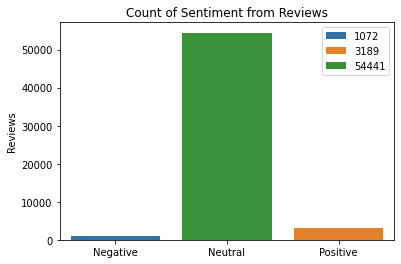

In [16]:
#neutral count is more as words like: book etc accounts for neutral words
pos_count = 0
neg_count = 0
neu_count = 0
for text in tokenized_word:
 #sentiment_analyzer_scores(text)
 sid_obj = SentimentIntensityAnalyzer() 
 sentiment_dict = sid_obj.polarity_scores(text)
 #print(sentiment_dict)
 if sentiment_dict['compound'] >= 0.05 or sentiment_dict['pos'] > 0.0:
   pos_count +=  1
 elif sentiment_dict['compound'] <= -0.05 or sentiment_dict['neg'] > 0.0:
   neg_count +=  1
 else : 
   neu_count +=1
print(pos_count)
print(neg_count)
print(neu_count)

summ = ['Negative', 'Neutral','Positive']
count= [neg_count,neu_count, pos_count]
ax = sns.barplot(summ, count, hue= count, dodge= False)
ax.set(ylabel='Reviews',
       title= 'Count of Sentiment from Reviews')

1621
296
777
36
291


[Text(0, 0.5, 'Reviews'),
 Text(0.5, 1.0, 'Count of  Multi-dimensional Reviews ')]

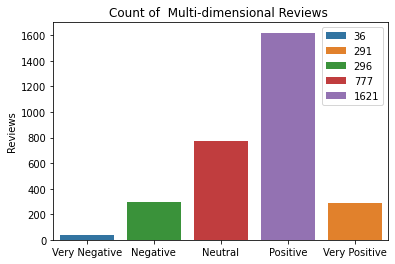

In [17]:
post = 0
v_post = 0
negt = 0
v_negt=0
neut = 0
vn= []
for text in tokenized_text:
 #sentiment_analyzer_scores(text)
 sid_obj = SentimentIntensityAnalyzer() 
 sentiment_dict = sid_obj.polarity_scores(text)
 #print(sentiment_dict)
 if (sentiment_dict['pos'] > 0.0 and sentiment_dict['pos'] < 0.5):
   post +=  1
 elif sentiment_dict['pos'] >= 0.5 :
   v_post += 1
 elif (sentiment_dict['neg'] > 0.0 and sentiment_dict['neg'] < 0.5):
   negt +=  1
 elif sentiment_dict['neg'] >= 0.5 :
   v_negt += 1
   vn.append(text)
 else : 
   neut +=1
print(post)
print(negt)
print(neut)
print(v_negt)
print(v_post)
summ = ['Very Negative', 'Negative', 'Neutral','Positive', 'Very Positive']
count= [v_negt, negt,neut, post, v_post]
ax = sns.barplot(summ, count, hue= count, dodge= False)
ax.set(ylabel='Reviews',
       title= 'Count of  Multi-dimensional Reviews ')

**Without Stopwords and without Neutral words**

---



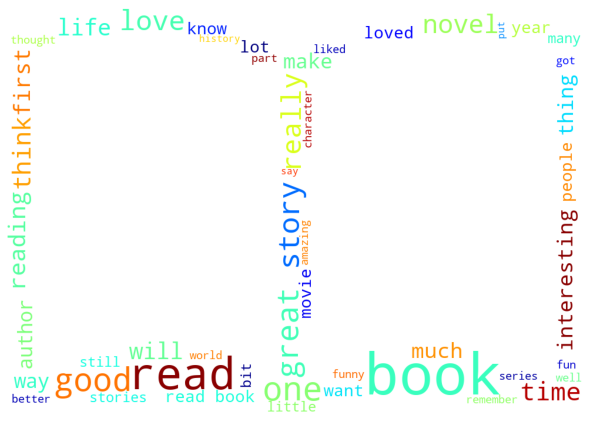

In [107]:
mask = np.array(Image.open('/content/bookkk2.png'))

def word_cloud(wd_list, mask):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=200,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200,
        mask= mask).generate(all_words)
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.tight_layout(pad = 0) ;

word_cloud(tokenized_word, mask)

Positive and Negative set of data

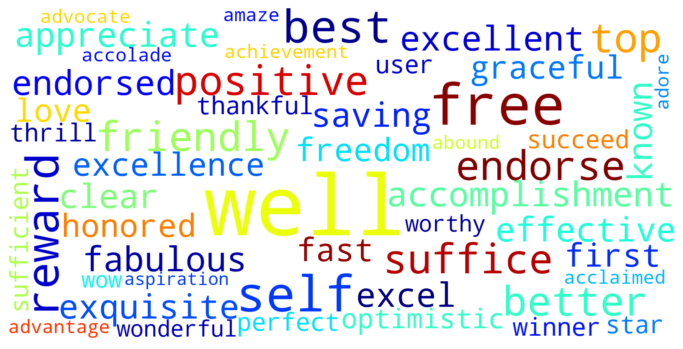

In [18]:
def form_sent(sent):
     return {word: True for word in nltk.word_tokenize(sent)}

pos_s = []
pos = []
with open("/content/positive-words.csv", encoding="Latin-1") as f:
    for i in f: 
        pos.append([form_sent(i), 'positive'])
        pos_s.append(i)
pos[:5]
pos_s[:5]

def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

word_cloud(pos_s)    

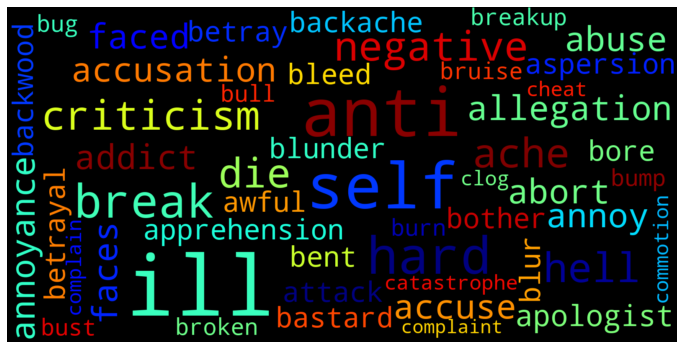

In [19]:
neg = []
neg_s = []
import io
with io.open("/content/negative-words.csv", encoding="Latin-1") as f1:
  for i in f1: 
    #print(type(n))
    neg.append([form_sent(i), 'negative'])
    neg_s.append(i)
neg[:5]
neg_s[:5]

def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

word_cloud(neg_s)

In [20]:
training = pos[:int((.8)*len(pos))] + neg[:int((.8)*len(neg))]
test = pos[int((.8)*len(pos)):] + neg[int((.8)*len(neg)):]


classifier = nltk.NaiveBayesClassifier.train(training)
classifier.show_most_informative_features()

featre=[]
label =[]
total = []
for t in tokenized_text: 
  featre .append(t)
  label.append(classifier.classify(form_sent(str(t))))
  print(t)
  print(classifier.classify(form_sent(str(t))))
  tt = t + " " + (classifier.classify(form_sent(str(t))))
  total.append(tt)
print(total[:5])

Streaming output truncated to the last 5000 lines.
",  "a real masterpiece.beautifully written, great plot, and cast of characters.... the mood of the book and barcelona are captivating.
positive
this is easily in the top  novels i have ever read.
negative
",  'probably would want the ruby programming book by the same author to go along with it.
negative
',  "good book to get set into the author is mindset.
positive
but like the majority of other financial self help book, this book will probably benefit the author more then it will its reader.
positive
either way, its still an interesting read.
positive
",  'the book really shows how agile and fast pace start up needs to be to go up against big competition.
positive
',  "i enjoyed this book, thought it was very interesting.
positive
it was especially interesting because spent week in delft, holland where we saw many of vermeer is paintings, so could really relate to this story.
positive
",  "this was great book for programmers to read.

Count Vectorizer

In [21]:
# Bag-ofwords approach
#RF gives better accuracy for entropy than gini criterion
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(featre).toarray()
y= label
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.20, random_state=0)
len(X_test) #129
len(X_train) #513

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score
acc = (accuracy_score(y_test, y_pred))*100
percent_acc = print("Accuracy for Gaussian Naive-Bayes is : " + str(acc))

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
from sklearn import tree
tree = tree.DecisionTreeClassifier(random_state=42)
tree.fit(X_train,y_train)
y_pred1 = tree.predict(X_test)
cm2= confusion_matrix(y_test, y_pred1)
acc1 = (accuracy_score(y_test, y_pred1))*100
percent_acc_1 = print("Accuracy for Decision Tree is : " + str(acc1))

#print(f'Model Accuracy: {tree.score(X, y)}')

# Fitting RandomForest to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 13, criterion = 'entropy',
                                    random_state = 0)
classifier.fit(X_train,y_train)
y_pred2 = classifier.predict(X_test)


cm2= confusion_matrix(y_test, y_pred2)
acc2 = (accuracy_score(y_test, y_pred2))*100
percent_acc2 = print("Accuracy for Random Forest is : " + str(acc2))

#SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0) #radial basis function
classifier.fit(X_train, y_train)
y_pred3 = classifier.predict(X_test)

cm3= confusion_matrix(y_test, y_pred3)
acc3 = (accuracy_score(y_test, y_pred3))*100
percent_acc3 = print("Accuracy for SVM is : " + str(acc3))
#knn
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric= 'minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred4 = classifier.predict(X_test)
cm4= confusion_matrix(y_test, y_pred4)
acc4 = (accuracy_score(y_test, y_pred4))*100
percent_acc4 = print("Accuracy for KNN is : " + str(acc4))

Accuracy for Gaussian Naive-Bayes is : 65.12396694214875
Accuracy for Decision Tree is : 81.98347107438016
Accuracy for Random Forest is : 81.32231404958678
Accuracy for SVM is : 75.37190082644628
Accuracy for KNN is : 71.40495867768595


TF-IDF

[[257  28]
 [ 50 270]]
              precision    recall  f1-score   support

    negative       0.84      0.90      0.87       285
    positive       0.91      0.84      0.87       320

    accuracy                           0.87       605
   macro avg       0.87      0.87      0.87       605
weighted avg       0.87      0.87      0.87       605

Accuracy for Random Forest is : 87.10743801652893
Accuracy for Gaussian Naive-Bayes is : 66.61157024793388
Accuracy for Decision Tree is : 82.47933884297521
Accuracy for SVM is : 83.30578512396694
Accuracy for KNN is : 57.190082644628106
[[272  48]
 [ 58 227]]


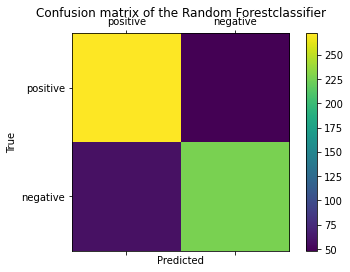

In [22]:
#Another Method for text classification: tf-idf:
#TF-IDF gives a better output
  
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(tokenized_text).toarray()
y= label
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Make a random forest train and test


text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(f"Accuracy for Random Forest is : " + str(accuracy_score(y_test, predictions)*100))
 
# Make a Gaussian Naive-Bayes train and test

classifier_NB = GaussianNB()
classifier_NB.fit(X_train,y_train)

y_pred5 = classifier_NB.predict(X_test)

cm1= confusion_matrix(y_test, y_pred5)
#print(accuracy(y_pred, y_test))

acc5 = (accuracy_score(y_test, y_pred5))*100
percent_acc = print("Accuracy for Gaussian Naive-Bayes is : " + str(acc5))

# Make a decision tree and train
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
from sklearn import tree
tree = tree.DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
predictions = tree.predict(X_test)
cm2= confusion_matrix(y_test, predictions)
acc = (accuracy_score(y_test, predictions))*100
percent_acc = print(f"Accuracy for Decision Tree is : " + str(acc))


classifier = SVC(kernel = 'rbf', random_state = 0) #radial basis function
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm3= confusion_matrix(y_test, y_pred)
acc = (accuracy_score(y_test, y_pred))*100
percent_acc = print("Accuracy for SVM is : " + str(acc))

#knn

classifier = KNeighborsClassifier(n_neighbors = 5, metric= 'minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cm3= confusion_matrix(y_test, y_pred)
acc = (accuracy_score(y_test, y_pred))*100
percent_acc = print("Accuracy for KNN is : " + str(acc))

labels = ['positive', 'negative']
cm = confusion_matrix(y_test, predictions, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Random Forestclassifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

10- fold Cross-validation technique

LR: 0.822430 (0.017772)
LDA: 0.759101 (0.014455)
KNN: 0.562904 (0.019249)
TREE: 0.828644 (0.014165)
NB: 0.682932 (0.024506)
SVM: 0.814153 (0.009344)
RF: 0.850993 (0.013290)


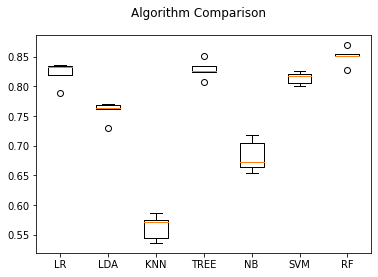

In [23]:
#10 folds cross validation to improve efficiency
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('TREE', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5,shuffle= True, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [24]:
sw = stopwords.words('english')
def cleaning_data(data):
    aux_list = []
    flag = False
    for phase_word in data:
        word_list = []
        for word in phase_word.split():
            word = word.lower()
            if flag and not word in sw:
                flag = False
                word_list.append('not_'+word)
                continue
            if re.search('(n\'t)$|(not)|(no)|(never)', word):
                flag = True
                continue
            if not word in sw:
                word = re.sub('[\W_0-9]', ' ', word)
                word_list.append(word)
        aux_list.append(' '.join(word_list))
    return aux_list

In [66]:
X = cleaning_data(featre)

y= label
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.20)

#This CountVectorizer is used to represent the words as a list of values, instead of text
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

Neural Network

In [67]:
#The keras library was used to create a NN. (Backward propagation)
#The NN uses the relu as activation function in the hidden layer and the sigmoid in the output layer.
from keras.layers import Dense, Dropout
from keras.models import Sequential
model = Sequential()
model.add(Dense(units=300, activation='relu', input_dim=len(vectorizer.get_feature_names())))
model.add(Dense(units=600, activation='relu'))
#model.add(Dense(units =800, activation='relu'))
#model.add(Dense(units =1000, activation='relu'))
model.add(Dropout (0.10))
model.add(Dense(units =10,activation = 'softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, shuffle= False, batch_size= 32, epochs=10, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy:", scores[1])

Epoch 1/10
76/76 [==============================] - 1s 11ms/step - loss: 0.7593 - accuracy: 0.6772
Epoch 2/10
76/76 [==============================] - 1s 10ms/step - loss: 0.1801 - accuracy: 0.9363
Epoch 3/10
76/76 [==============================] - 1s 10ms/step - loss: 0.0479 - accuracy: 0.9863
Epoch 4/10
76/76 [==============================] - 1s 10ms/step - loss: 0.0191 - accuracy: 0.9942
Epoch 5/10
76/76 [==============================] - 1s 9ms/step - loss: 0.0127 - accuracy: 0.9954
Epoch 6/10
76/76 [==============================] - 1s 10ms/step - loss: 0.0101 - accuracy: 0.9967
Epoch 7/10
76/76 [==============================] - 1s 10ms/step - loss: 0.0091 - accuracy: 0.9967
Epoch 8/10
76/76 [==============================] - 1s 9ms/step - loss: 0.0087 - accuracy: 0.9971
Epoch 9/10
76/76 [==============================] - 1s 9ms/step - loss: 0.0080 - accuracy: 0.9975
Epoch 10/10
19/19 [==============================] - 0s 2ms/step - loss: 1.0718 - accuracy: 0.7917
Accuracy: 0.7

**Without Stopwords and With Neutral Words: More accuracy**

---



In [30]:
#when including neutral words
sw = stopwords.words('english')
def cleaning_data(data):
    aux_list = []
    flag = False
    for phase_word in data:
        word_list = []
        for word in phase_word.split(","):
            word = word.lower()
            if flag and not word in sw:
                flag = False
                word_list.append('not_'+word)
                continue
            # if re.search('(n\'t)$|(not)|(no)|(never)', word):
            #     flag = True
            #     continue
            
            if not word in sw:
                word = re.sub('[\W_0-9]', ' ', word)
                word_list.append(word)
        aux_list.append(' '.join(word_list))
    return aux_list

x = cleaning_data(featre)
ts = sent_tokenize(str(x))
#print(ts)
sen = str(ts).split(",")
#sen
#sen = re.sub("<a target=*", "", str(sen))
type(ts)
tw = word_tokenize(str(sen))

Streaming output truncated to the last 5000 lines.
NEUTRALLLLLLLLLLLLLLLLL
################################################
NEUTRALLLLLLLLLLLLLLLLL
################################################
NEUTRALLLLLLLLLLLLLLLLL
################################################
NEUTRALLLLLLLLLLLLLLLLL
################################################
NEUTRALLLLLLLLLLLLLLLLL
################################################
POSITIVEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE
new
################################################
NEUTRALLLLLLLLLLLLLLLLL
################################################
NEUTRALLLLLLLLLLLLLLLLL
################################################
NEUTRALLLLLLLLLLLLLLLLL
################################################
NEUTRALLLLLLLLLLLLLLLLL
################################################
NEUTRALLLLLLLLLLLLLLLLL
################################################
NEUTRALLLLLLLLLLLLLLLLL
################################################
NEUTRALLLLLLLLLLLLLLLLL
##############################

[Text(0, 0.5, 'Reviews'),
 Text(0.5, 1.0, 'Count of Sentiment from Reviews-Naive-Bayes')]

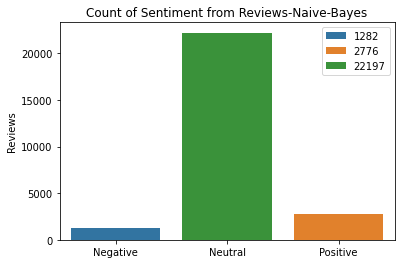

In [31]:
#Finding Neutral words
pos_s[:5]
convert = []

for element in pos_s:
    convert.append(element.strip())

convert_neg = []
for element in neg_s:
    convert_neg.append(element.strip())
convert_neg[:5]

pos_count = 0
neg_count = 0
neu_count = 0
neutral = []
negat = []
for text in tw:
  if text not in sw :
    if text in ('!"'"'"'[#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n') or text in ("'"):
      text = re.sub(r'[^A-Za-z0-9'']+', '', text)
    if text in convert:
      print("POSITIVEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE")
      pos_count += 1;
      print(text)
      print('################################################')
    elif text in convert_neg:
      print("NEGATIVEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE")
      neg_count += 1;
      print(text)
      print('################################################')
    elif re.match('not_*', text):
      print("NEGATIVEEEEEEEEEEE")
      negat.append(text)
      neg_count += 1;
    elif text in ('') or text in ("'``'") or text in ("'i") or text in ("'it") or text in ("'did") or text in ("'my"):
      continue
    else:
      print("NEUTRALLLLLLLLLLLLLLLLL")
      neu_count +=1;
      neutral.append(text)
      print('################################################')
lab = ['Negative', 'Neutral','Positive']
count= [neg_count,neu_count, pos_count]
ax = sns.barplot(lab, count, hue= count, dodge= False)
ax.set(ylabel='Reviews',
       title= 'Count of Sentiment from Reviews-Naive-Bayes')

In [32]:
tagged = nltk.pos_tag(neutral)
neu_s =  ([(word) for word, tag in tagged if tag in ('JJ', 'RB', 'JJR', 'JJS','RBR', 'RBS')])

print(neu_s[:5])

['ever', 'potter', 'abe', 'u', 'please']


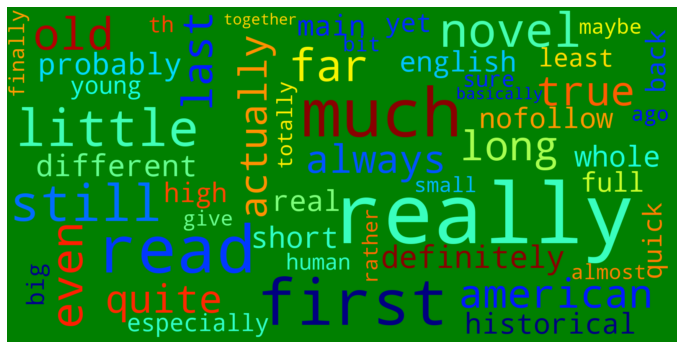

In [33]:
neu = []
for i in neu_s: 
  neu.append([form_sent(i), 'neutral'])
neu[:5]

def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='green',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

word_cloud(neu_s)

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, ' Words'),
 Text(0.5, 1.0, 'Count of Positive, Negative and Neutral Words')]

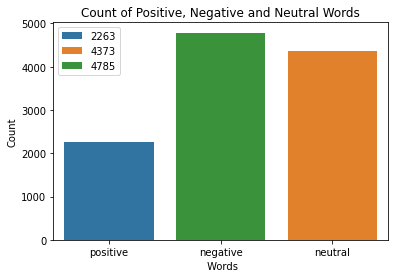

In [34]:
wrd = [len(pos_s), len(neg_s), len(neu_s)]
x = ['positive', 'negative', 'neutral']
ax = sns.barplot(x, wrd, hue= wrd, dodge= False)
ax.set(xlabel= ' Words',
       ylabel='Count',
       title= 'Count of Positive, Negative and Neutral Words')

In [35]:
neu = []
for i in neu_s: 
  neu.append([form_sent(i), 'neutral'])
neu[:5]

neg = []
for i in neg_s: 
  neg.append([form_sent(i), 'negative'])
neg[:5]

[[{'Negative': True, 'Words': True}, 'negative'],
 [{'2-faced': True}, 'negative'],
 [{'2-faces': True}, 'negative'],
 [{'abnormal': True}, 'negative'],
 [{'abolish': True}, 'negative']]

In [36]:
training = pos[:int((.8)*len(pos))] + neg[:int((.8)*len(neg))] + neu[:int((.8)*len(neu))]
test = pos[int((.8)*len(pos)):] + neg[int((.8)*len(neg)):] + neu[int((.8)*len(neu)):]

#print(training)
classifier = nltk.NaiveBayesClassifier.train(training)
classifier.show_most_informative_features()

featre_n=[]
label_n =[]
for t in sen: 
  featre_n .append(t)
  label_n.append(classifier.classify(form_sent(str(t))))
  #print(t)
  #print(classifier.classify(form_sent(str(t))))
#print(label_n)

Most Informative Features
                 envious = True           positi : negati =      2.1 : 1.0
             enviousness = True           positi : negati =      2.1 : 1.0
                   Words = True           positi : negati =      2.1 : 1.0
               enviously = True           positi : negati =      2.1 : 1.0
                  really = None           negati : neutra =      1.0 : 1.0
                    much = None           negati : neutra =      1.0 : 1.0
                   first = None           negati : neutra =      1.0 : 1.0
                    read = None           negati : neutra =      1.0 : 1.0
                  little = None           negati : neutra =      1.0 : 1.0
                    also = None           negati : neutra =      1.0 : 1.0


In [37]:
stopwords_nltk = set(stopwords.words("english"))
relevant_words = set(['not', 'nor', 'no', 'wasn', 'ain', 'aren', 'very', 'only', 'but', 'don', 'isn', 'weren'])
stopwords_filtered = list(stopwords_nltk.difference(relevant_words))
cv = CountVectorizer(stop_words = stopwords_filtered,max_features=1500)
X = cv.fit_transform(featre_n).toarray()
y= label_n
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.20, random_state=0)
len(X_test) #129
len(X_train) #513

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(y_test, y_pred)
#print(accuracy(y_pred, y_test))

acc = (accuracy_score(y_test, y_pred))*100
percent_acc = print("Accuracy for Gaussian Naive-Bayes is : " + str(acc))

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
from sklearn import tree
tree = tree.DecisionTreeClassifier(random_state=42)
tree.fit(X_train,y_train)
y_pred1 = tree.predict(X_test)
cm2= confusion_matrix(y_test, y_pred1)
acc1 = (accuracy_score(y_test, y_pred1))*100
percent_acc_1 = print("Accuracy for Decision Tree is : " + str(acc1))

# Fitting RandomForest to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 13, criterion = 'entropy',
                                    random_state = 0)
classifier.fit(X_train,y_train)
y_pred2 = classifier.predict(X_test)

cm2= confusion_matrix(y_test, y_pred2)
acc2 = (accuracy_score(y_test, y_pred2))*100
percent_acc2 = print("Accuracy for Random Forest is : " + str(acc2))

#SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0) #radial basis function
classifier.fit(X_train, y_train)
y_pred3 = classifier.predict(X_test)

cm3= confusion_matrix(y_test, y_pred3)
acc3 = (accuracy_score(y_test, y_pred3))*100
percent_acc3 = print("Accuracy for SVM is : " + str(acc3))
#knn
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric= 'minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred4 = classifier.predict(X_test)
cm4= confusion_matrix(y_test, y_pred4)
acc4 = (accuracy_score(y_test, y_pred4))*100
percent_acc4 = print("Accuracy for KNN is : " + str(acc4))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'don', 'isn', 'wasn', 'weren'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Accuracy for Gaussian Naive-Bayes is : 67.76859504132231
Accuracy for Decision Tree is : 66.11570247933885
Accuracy for Random Forest is : 72.56198347107437
Accuracy for SVM is : 74.3801652892562
Accuracy for KNN is : 57.35537190082645


In [43]:
#Another Method for text classification: tf-idf:
#TF-IDF gives a better output
  
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words = stopwords_filtered)  
X = tfidfconverter.fit_transform(sen).toarray()
y= label_n
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Make a random forest train and test

text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))
acc1 =   accuracy_score(y_test, predictions)*100
print(f"Accuracy for Random Forest is : " + str(accuracy_score(y_test, predictions)*100))
 
# Make a Gaussian Naive-Bayes train and test

classifier_NB = GaussianNB()
classifier_NB.fit(X_train,y_train)

y_pred5 = classifier_NB.predict(X_test)

cm1= confusion_matrix(y_test, y_pred5)
print(classification_report(y_test,y_pred5))
#print(accuracy(y_pred, y_test))

acc5 = (accuracy_score(y_test, y_pred5))*100
percent_acc = print("Accuracy for Gaussian Naive-Bayes is : " + str(acc5))

from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
tree_tdf = tree.DecisionTreeClassifier(random_state=42)
tree_tdf.fit(X_train,y_train)
predictions = tree_tdf.predict(X_test)
cm2= confusion_matrix(y_test, predictions)
acc2 = (accuracy_score(y_test, predictions))*100
percent_acc = print(f"Accuracy for Decision Tree is : " + str(acc2))
print(classification_report(y_test,predictions))

classifier = SVC(kernel = 'rbf', random_state = 0) #radial basis function
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm3= confusion_matrix(y_test, y_pred)
acc3 = (accuracy_score(y_test, y_pred))*100
percent_acc = print("Accuracy for SVM is : " + str(acc3))
print(classification_report(y_test,y_pred))
#knn

classifier = KNeighborsClassifier(n_neighbors = 3, metric= 'chebyshev',p=2) #ChebyshevDistance
classifier.fit(X_train,y_train)
y_pred6 = classifier.predict(X_test)
cm4= confusion_matrix(y_test, y_pred6)
acc4 = (accuracy_score(y_test, y_pred6))*100
percent_acc = print("Accuracy for KNN is : " + str(acc4))
print(classification_report(y_test,y_pred6))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'don', 'isn', 'wasn', 'weren'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


[[ 44  15   6]
 [ 35 380  24]
 [  9  49  43]]
              precision    recall  f1-score   support

    negative       0.50      0.68      0.58        65
     neutral       0.86      0.87      0.86       439
    positive       0.59      0.43      0.49       101

    accuracy                           0.77       605
   macro avg       0.65      0.66      0.64       605
weighted avg       0.77      0.77      0.77       605

Accuracy for Random Forest is : 77.1900826446281
              precision    recall  f1-score   support

    negative       0.49      0.72      0.59        65
     neutral       0.89      0.69      0.77       439
    positive       0.24      0.41      0.30       101

    accuracy                           0.64       605
   macro avg       0.54      0.60      0.55       605
weighted avg       0.74      0.64      0.67       605

Accuracy for Gaussian Naive-Bayes is : 64.29752066115702
Accuracy for Decision Tree is : 70.24793388429752
              precision    recall  f

**Fine- Grained Analysis**

Text(0, 0.5, 'Accuracy')

<Figure size 1440x360 with 0 Axes>

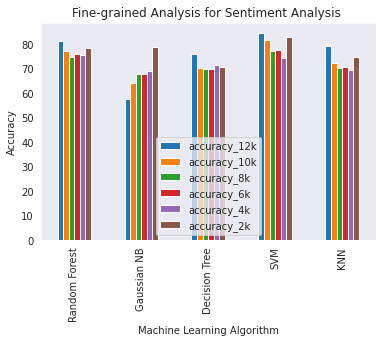

In [ ]:
# acc5_12k= acc5; acc1_12k = acc1; acc2_12k = acc2; acc3_12k = acc3; acc4_12k = acc4

# acc5_10k= acc5; acc1_10k = acc1; acc2_10k = acc2; acc3_10k = acc3; acc4_10k = acc4

# acc5_8k= acc5; acc1_8k = acc1; acc2_8k = acc2; acc3_8k = acc3; acc4_8k = acc4

# acc5_6k= acc5; acc1_6k = acc1; acc2_6k = acc2; acc3_6k = acc3; acc4_6k = acc4

# acc5_4k= acc5; acc1_4k = acc1; acc2_4k = acc2; acc3_4k = acc3; acc4_4k = acc4

acc5_2k= acc5
acc1_2k = acc1
acc2_2k = acc2
acc3_2k = acc3
acc4_2k = acc4

accuracy_12k = [acc1_12k,acc5_12k,acc2_12k, acc3_12k,acc4_12k]
accuracy_12k = [float(x) for x in accuracy_12k]

accuracy_10k = [acc1_10k,acc5_10k,acc2_10k, acc3_10k,acc4_10k]
accuracy_10k = [float(x) for x in accuracy_10k]
accuracy_8k = [acc1_8k, acc5_8k, acc2_8k, acc3_8k, acc4_8k]
accuracy_8k = [float(x) for x in accuracy_8k]
accuracy_6k = [acc1_6k, acc5_6k, acc2_6k, acc3_6k, acc4_6k]
accuracy_6k = [float(x) for x in accuracy_6k]

accuracy_4k = [acc1_4k, acc5_4k, acc2_4k, acc3_4k, acc4_4k]
accuracy_4k = [float(x) for x in accuracy_4k]

accuracy_2k = [acc1_2k, acc5_2k, acc2_2k, acc3_2k, acc4_2k]
accuracy_2k = [float(x) for x in accuracy_2k]

fig = plt.figure(figsize = (20,5)) # Create matplotlib figure
sns.set_style("dark")

plotdata = pd.DataFrame({ "accuracy_12k":accuracy_12k , 
                         "accuracy_10k":accuracy_10k,
                          "accuracy_8k":accuracy_8k, 
                          "accuracy_6k":accuracy_6k, 
                          "accuracy_4k": accuracy_4k, 
                          "accuracy_2k":accuracy_2k
                         }, 
                        index= ['Random Forest', 'Gaussian NB', 'Decision Tree', 'SVM', 'KNN'])
# sns.set_style("dark")
plotdata.plot(kind="bar")
plt.title("Fine-grained Analysis for Sentiment Analysis ")
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Accuracy")

Word2vec: Relationship between words(king-men, queen-women analogy)

  Created wheel for adjustText: filename=adjustText-0.7.3-cp36-none-any.whl size=7100 sha256=79ddaab53db39db136b7e78f8818b48bcd73dd9ce341b68d7392ef3393b63571
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


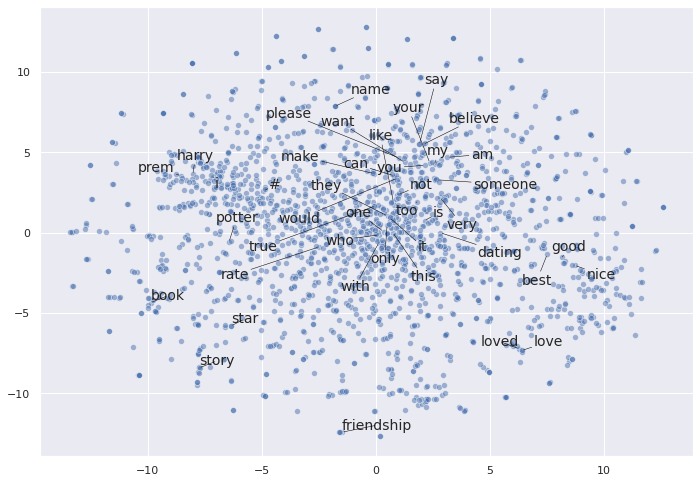

In [44]:
from nltk.corpus import stopwords
import random
!pip install adjustText
words = [word.lower() for word in tokenized_word ]
stop_words= stopwords.words('english')
words= [word for word in words if not words in stop_words]
words[:10]

#!pip install gensim
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz",
                                          binary= True)

model.vector_size
vector_list= [model[word] for word in words if word in model.vocab]
filtered_word = [word for word in words if word in model.vocab]
word_vec_zip = zip(filtered_word, vector_list)
word_vec_dict= dict(word_vec_zip)
df1= pd.DataFrame. from_dict(word_vec_dict, orient= 'index')
df1.shape
df1
from sklearn.manifold import TSNE
tsne = TSNE(n_components =2,  random_state= 10, perplexity= 100)
tsne_df = tsne.fit_transform(df1[:2000])
from adjustText import adjust_text
sns.set()
fig,ax = plt.subplots(figsize=(11.7, 8.27))
sns.scatterplot(tsne_df[:,0],tsne_df[:,1], alpha=0.5)
texts= []
words_to_plot = list(np.arange(0,42,1))
for words in words_to_plot:
  texts.append(plt.text(tsne_df[words,0], tsne_df[words,1], df1.index[words], fontsize=14))
adjust_text(texts,force_points= 0.4, force_text= 0.4,
            expand_points= (2,1), expand_text =(1,2),
            arrowprops= dict(arrowstyle= "-", color= "black", lw= 0.5))
plt.show()

N-grams

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
stopwords_nltk = set(stopwords.words("english"))
print(stopwords_nltk)
relevant_words = set(['not', 'nor', 'no', 'wasn', 'ain', 'aren', 'very', 'only', 'but', 'don', 'isn', 'weren'])
stopwords_filtered = list(stopwords_nltk.difference(relevant_words))
cv = CountVectorizer(stop_words = stopwords_filtered, max_features = 10000, ngram_range = (1,2))

X_train= featre_n[:int((.5)*len(featre_n))]
X_test = featre_n[int((.5)*len(featre_n)):]
len(X_test)
y_train = np.append(np.zeros(755), np.ones(755))
y_test = np.append(np.zeros(755), np.ones(756))


X_train_features = cv.fit_transform(X_train)
X_test_features = cv.transform(X_test)

logistic_model = LogisticRegression(C=0.03)
logistic_model.fit(X_train_features, y_train)

vocabulary = cv.get_feature_names()
coefs = logistic_model.coef_
word_importances = pd.DataFrame({'word': vocabulary, 'coef': coefs.tolist()[0]})
word_importances_sorted = word_importances.sort_values(by='coef', ascending = False)
word_importances_sorted[0:10]
word_importances_sorted[-11:-1]

,word,coef
946,bit,-0.114533
2119,culture,-0.118999
4875,only,-0.122288
453,another,-0.125013
3320,good,-0.128843
3602,like,-0.155732
1092,br,-0.159944
272,also,-0.189595
6019,read,-0.202665
962,book,-0.219677


In [ ]:
#bigram giving better result
word_importances_bigrams = word_importances_sorted[word_importances_sorted.word.apply(lambda c: len(c.split()) >= 2)]
word_importances_bigrams[:10]
word_importances_bigrams[-11:-1]

,word,coef
6033,read book,0.080243
3651,lots laughs,0.075385
3414,high school,0.063609
9574,whole series,0.063562
3660,love whole,0.063562
7183,short stories,0.062958
985,book not,0.059042
9222,very good,0.058578
1053,boss wrote,0.056987
971,book genius,0.056987


In [55]:
X = cleaning_data(featre_n)
y= label_n
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.20)

#This CountVectorizer is used to represent the words as a list of values, instead of text
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

from keras.layers import Dense, Dropout
from keras.models import Sequential
model = Sequential()
model.add(Dense(units=300, activation='relu', input_dim=len(vectorizer.get_feature_names())))
model.add(Dense(units=600, activation='relu'))
model.add(Dense(units =300, activation='relu'))
#model.add(Dense(units =1000, activation='relu'))
model.add(Dropout (0.25))
model.add(Dense(units =10,activation = 'softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, shuffle= True, batch_size= 32, epochs=5, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy:", scores[1])

Epoch 1/5
76/76 [==============================] - 1s 12ms/step - loss: 0.8869 - accuracy: 0.6784
Epoch 2/5
76/76 [==============================] - 1s 12ms/step - loss: 0.3606 - accuracy: 0.8531
Epoch 3/5
76/76 [==============================] - 1s 12ms/step - loss: 0.0892 - accuracy: 0.9710
Epoch 4/5
76/76 [==============================] - 1s 12ms/step - loss: 0.0340 - accuracy: 0.9884
Epoch 5/5
19/19 [==============================] - 0s 2ms/step - loss: 1.0888 - accuracy: 0.8116
Accuracy: 0.8115702271461487


one-hot encoding

In [64]:
import re
import collections
from pathlib import Path
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import models
from keras import layers
from keras.layers import Dense, Embedding, LSTM

NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 10  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent
MAX_LEN = 24  # Maximum number of words in a sequence
X = cleaning_data(featre_n)

y= label_n
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.20)

tk = Tokenizer(num_words=NB_WORDS,
filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n',lower=True, split=" ")
tk.fit_on_texts(X_train)
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=MAX_LEN)

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

# X_valid_emb.shape
# y_valid_emb.shape
X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(X_train_seq_trunc, 
                                                                      y_train_oh, 
                                                                      test_size=0.2, 
                                                                      random_state=42)
emb_model = models.Sequential()
emb_model.add(layers.Embedding(NB_WORDS, 100, input_length=MAX_LEN))
emb_model.add(layers.Flatten())
emb_model.add(layers.Dense(units = 500, activation='relu'))
emb_model.add(Dropout (0.20))
emb_model.add(layers.Dense(units = 3, activation='softmax'))

emb_model.compile(optimizer="adam", loss= 'categorical_crossentropy', metrics = ['accuracy'])
emb_history = emb_model.fit(X_train_emb, y_train_emb, epochs=5, batch_size= 64, 
                            validation_data=[ X_valid_emb, y_valid_emb])

emb_results = emb_model.evaluate(X_test_seq_trunc, y_test_oh)
#print('/n')
print('Test accuracy of word embeddings model: {0:.2f}%'.format(emb_results[1]*100))

Epoch 1/5
31/31 [==============================] - 1s 31ms/step - loss: 0.8468 - accuracy: 0.6656 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
31/31 [==============================] - 1s 27ms/step - loss: 0.6348 - accuracy: 0.7086 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/5
31/31 [==============================] - 1s 28ms/step - loss: 0.4348 - accuracy: 0.8033 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/5
31/31 [==============================] - 1s 27ms/step - loss: 0.2142 - accuracy: 0.9467 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/5
19/19 [==============================] - 0s 4ms/step - loss: 0.8109 - accuracy: 0.7521
Test accuracy of word embeddings model: 75.21%


**References**
1. Word2vec : http://ethen8181.github.io/machine-learning/deep_learning/word2vec/word2vec_detailed.html
2. Naive bayes: https://www.twilio.com/blog/2017/09/sentiment-analysis-python-messy-data-nltk.html
3. Vader: https://github.com/letstryy/Sentiment-score-prediction/blob/master/news_predict.ipynb
4. NLTK: https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
5. NLTK: https://www.nltk.org/book/ch05.html
6. VADER: https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f
7. NLTK: https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
8. Ngram: https://rstudio-pubs-static.s3.amazonaws.com/325301_bc4d4b7a9eb04318a275e92eb210d3b1.html







